##  Pre-processing and Training Data Development

In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetic_df = pd.read_csv('../data/diabetic_data_preprocessed3.csv',low_memory=False)

diabetic_df.shape

(70413, 44)

In [3]:
diabetic_df.head().T

,0,1,2,3,4
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,10-20,20-30,30-40,40-50,70-80
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No


### Feature Engineering
Create dummy features for object type features

In [4]:
dummies_df = diabetic_df.drop(['readmitted'], axis = 1)                      
X = pd.get_dummies(dummies_df, drop_first=True)

#### Split the data into test and train subsamples

In [5]:
from sklearn.model_selection import train_test_split

y = diabetic_df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

### Data Modeling

In [6]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [7]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
clf = RandomForestClassifier(n_estimators=200, random_state = 1,n_jobs=-1)

#model_res = clf.fit(X_train_scaled, y_train)
#y_pred = model_res.predict(X_test_scaled)

model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

#y_pred_prob = model_res.predict_proba(X_test_scaled)

#lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy = %.3f' % (ac))
print('Random Forest: f1-score = %.3f' % (f1))

Random Forest: Accuracy = 0.647
Random Forest: f1-score = 0.568


In [9]:
#Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['NO','>30','<30'], 
                     columns = ['NO','>30','<30'])

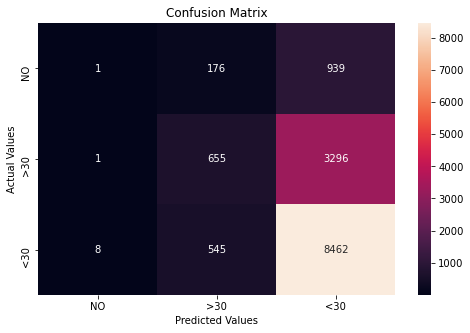

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt='.0f')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

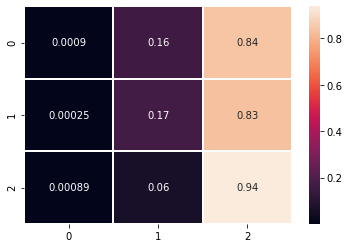

In [11]:
#Create normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, linewidths = 0.01);

#### Feature Importance

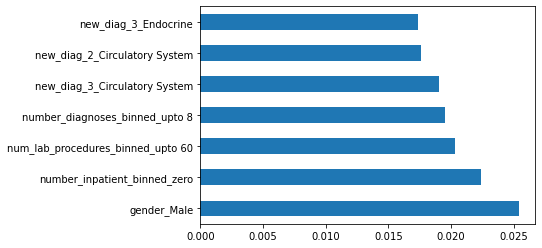

In [12]:
feat_importances = pd.Series(model_res.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh');

## Data Modeling using Pycaret

### Setting up the Environment in PyCaret

In [13]:
from pycaret.classification import *

In [14]:
# setup the dataset
# fix_imbalance -- When training dataset has unequal distribution of target class it can be balanced using this parameter
# When set to True, SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.
# fix_imbalance_method that is used here is 'imblearn.over_sampling.SMOTE' 

#clf1 = setup(data = diabetic_df, target='readmitted', fix_imbalance= True, session_id=123)
clf1 = setup(data = diabetic_df, target='readmitted', session_id=123)

,Description,Value
0,session_id,123
1,Target,readmitted
2,Target Type,Multiclass
3,Label Encoded,"<30: 0, >30: 1, NO: 2"
4,Original Data,"(70413, 44)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,43
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing All Models

In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6536,0.6678,0.3687,0.5961,0.5677,0.1107,0.1562,7.3970
lightgbm,Light Gradient Boosting Machine,0.6535,0.6726,0.3754,0.5947,0.5775,0.1288,0.1662,0.4050
catboost,CatBoost Classifier,0.6531,0.6713,0.3820,0.6005,0.5852,0.1436,0.1749,6.2090
lr,Logistic Regression,0.6517,0.6579,0.3701,0.5900,0.5703,0.1147,0.1545,7.4890
ridge,Ridge Classifier,0.6515,0.0000,0.3667,0.5658,0.5653,0.1055,0.1485,0.0890
lda,Linear Discriminant Analysis,0.6514,0.6576,0.3714,0.5921,0.5715,0.1166,0.1553,0.4500
xgboost,Extreme Gradient Boosting,0.6510,0.6662,0.3822,0.5964,0.5846,0.1416,0.1708,11.8970
ada,Ada Boost Classifier,0.6498,0.6474,0.3669,0.5748,0.5658,0.1055,0.1452,0.6420
rf,Random Forest Classifier,0.6477,0.6526,0.3690,0.5759,0.5687,0.1094,0.1442,2.4010
svm,SVM - Linear Kernel,0.6454,0.0000,0.3472,0.5651,0.5292,0.0454,0.0906,0.7330


### Create Models

Choosing these models for further assessment:
- CatBoost Classifier
- Light Gradient Boosting Machine 
- Extreme Gradient Boosting

#### CatBoost Classifier

In [16]:
#creating a model

catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6529,0.6708,0.3831,0.5854,0.5871,0.1469,0.1766
1,0.6529,0.6767,0.3816,0.5912,0.5852,0.1451,0.1755
2,0.6586,0.6728,0.3859,0.6183,0.5903,0.1545,0.1897
3,0.6470,0.6710,0.3781,0.5913,0.5795,0.1306,0.1580
4,0.6504,0.6662,0.3804,0.6239,0.5827,0.1386,0.1678
5,0.6504,0.6650,0.3780,0.5977,0.5801,0.1325,0.1638
6,0.6579,0.6750,0.3857,0.6032,0.5895,0.1520,0.1876
7,0.6525,0.6689,0.3837,0.5973,0.5871,0.1469,0.1760
8,0.6531,0.6689,0.3798,0.5960,0.5830,0.1400,0.1726
9,0.6552,0.6778,0.3835,0.6008,0.5877,0.1488,0.1811


#### Light Gradient Boosting Machine

In [17]:
 lightgbm = create_model('lightgbm')           

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6559,0.6776,0.3791,0.6141,0.5823,0.1378,0.1756
1,0.6529,0.6737,0.3750,0.5682,0.5777,0.1297,0.1657
2,0.6616,0.6734,0.3801,0.6089,0.5838,0.1442,0.1903
3,0.6579,0.6734,0.3805,0.6292,0.5834,0.1413,0.1814
4,0.6460,0.6664,0.3695,0.6069,0.5691,0.1113,0.1428
5,0.6474,0.6696,0.3695,0.6382,0.5691,0.1101,0.1440
6,0.6581,0.6765,0.3778,0.5795,0.5812,0.1368,0.1794
7,0.6517,0.6697,0.3754,0.5670,0.5780,0.1293,0.1634
8,0.6549,0.6717,0.3766,0.5723,0.5794,0.1334,0.1715
9,0.6485,0.6737,0.3703,0.5623,0.5708,0.1137,0.1483


In [ ]:
  print(lightgbm)              

#### Extreme Gradient Boosting

In [18]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6541,0.6708,0.3864,0.5948,0.5901,0.1525,0.1821
1,0.6539,0.6707,0.3836,0.5980,0.5874,0.1485,0.1791
2,0.6549,0.6696,0.3825,0.5948,0.5856,0.1449,0.1786
3,0.6496,0.6625,0.3857,0.6167,0.5863,0.1434,0.1703
4,0.6452,0.6607,0.3791,0.5980,0.5790,0.1288,0.1547
5,0.6482,0.6605,0.3763,0.5792,0.5782,0.1285,0.1582
6,0.6549,0.6701,0.3894,0.6058,0.5915,0.1552,0.1852
7,0.6480,0.6631,0.3777,0.5646,0.5814,0.1362,0.1633
8,0.6492,0.6585,0.3793,0.6043,0.5815,0.1355,0.1643
9,0.6516,0.6750,0.3817,0.6078,0.5848,0.1425,0.1719


In [ ]:
print(xgboost)

### Tune Models
This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. 

#### CatBoost Classifier

In [19]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6567,0.6691,0.3707,0.5783,0.5708,0.1170,0.1664
1,0.6539,0.6671,0.3695,0.5675,0.5698,0.1160,0.1595
2,0.6590,0.6669,0.3716,0.5824,0.5719,0.1206,0.1738
3,0.6581,0.6681,0.3722,0.5811,0.5727,0.1212,0.1719
4,0.6458,0.6609,0.3626,0.5529,0.5601,0.0943,0.1302
5,0.6482,0.6626,0.3623,0.5591,0.5588,0.0924,0.1335
6,0.6588,0.6753,0.3722,0.5828,0.5727,0.1214,0.1736
7,0.6506,0.6666,0.3673,0.5641,0.5664,0.1070,0.1477
8,0.6506,0.6666,0.3664,0.5639,0.5649,0.1049,0.1467
9,0.6520,0.6700,0.3649,0.5692,0.5622,0.0997,0.1464


##### Tuning catboost gave us a lightly lower value, so with go with original catboost value

#### Light Gradient Boosting Machine

In [20]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6579,0.6704,0.3774,0.5791,0.5805,0.1348,0.1778
1,0.6537,0.6683,0.3731,0.5685,0.5749,0.1246,0.1639
2,0.6579,0.6650,0.3742,0.5787,0.5760,0.1272,0.1741
3,0.6575,0.6714,0.3747,0.5797,0.5765,0.1269,0.1730
4,0.6468,0.6610,0.3672,0.5553,0.5671,0.1081,0.1417
5,0.6506,0.6674,0.3681,0.5647,0.5676,0.1089,0.1488
6,0.6606,0.6767,0.3778,0.5833,0.5809,0.1373,0.1847
7,0.6533,0.6687,0.3725,0.5690,0.5739,0.1218,0.1615
8,0.6531,0.6680,0.3742,0.5696,0.5760,0.1257,0.1637
9,0.6512,0.6699,0.3699,0.5666,0.5701,0.1133,0.1526


##### Tuned Light Gradient Boosting machine gave slightly better result

#### Extreme Gradient Boosting

In [21]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6573,0.6729,0.3816,0.5785,0.5860,0.1451,0.1822
1,0.6547,0.6748,0.3784,0.5937,0.5810,0.1364,0.1730
2,0.6588,0.6721,0.3807,0.6059,0.5843,0.1427,0.1836
3,0.6573,0.6666,0.3812,0.6287,0.5844,0.1426,0.1809
4,0.6478,0.6656,0.3712,0.5855,0.5719,0.1168,0.1493
5,0.6462,0.6643,0.3695,0.5731,0.5696,0.1116,0.1435
6,0.6622,0.6789,0.3866,0.6060,0.5915,0.1574,0.1979
7,0.6541,0.6713,0.3780,0.5709,0.5816,0.1372,0.1722
8,0.6543,0.6697,0.3767,0.5722,0.5796,0.1333,0.1705
9,0.6514,0.6758,0.3737,0.6455,0.5748,0.1222,0.1585


##### Tuned xgboost performed better 

### Plot Models

#### CatBoost Classifier

##### Confusion Matrix

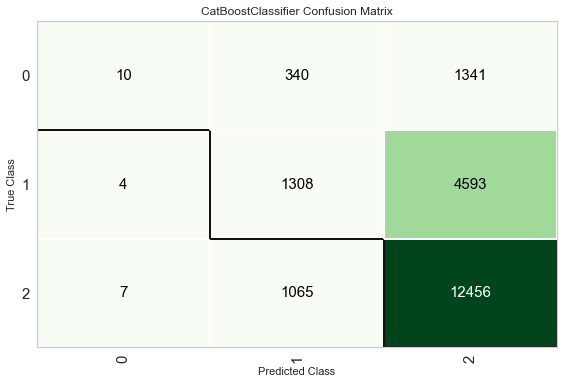

In [27]:
plot_model(catboost, plot = 'confusion_matrix')

##### Classification Report

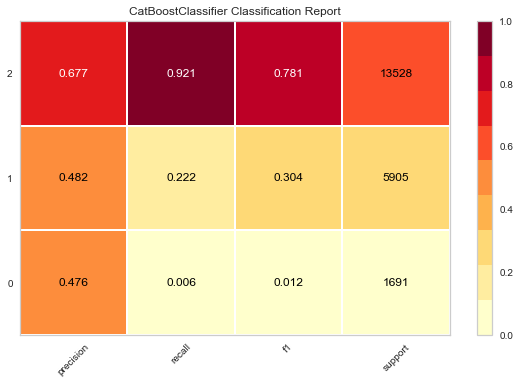

In [28]:
plot_model(catboost, plot = 'class_report')

##### AUC

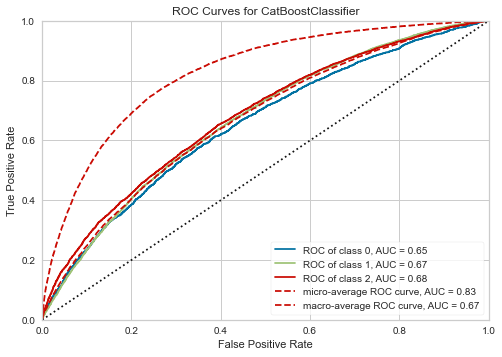

In [29]:
plot_model(catboost, plot = 'auc')

##### Feature Importance

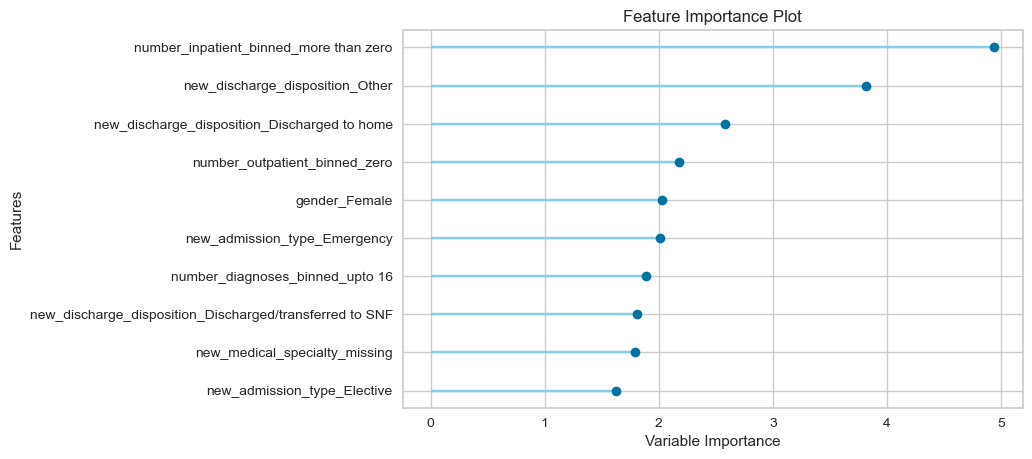

In [30]:
plot_model(catboost, plot = 'feature')

##### Prediction Error Plot

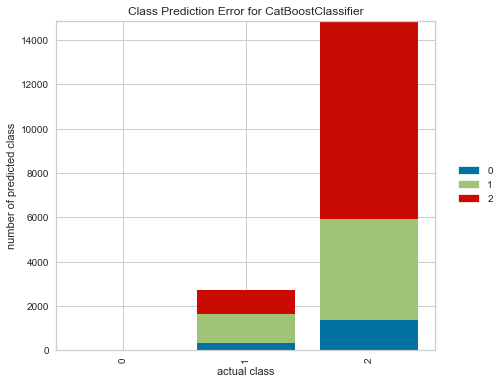

In [32]:
plot_model(catboost, plot = 'error')

#### Light Gradient Boosting Machine   

##### Confusion Matrix

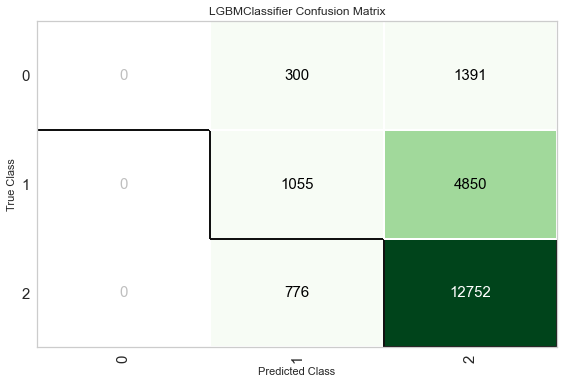

In [33]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

##### Classification Report

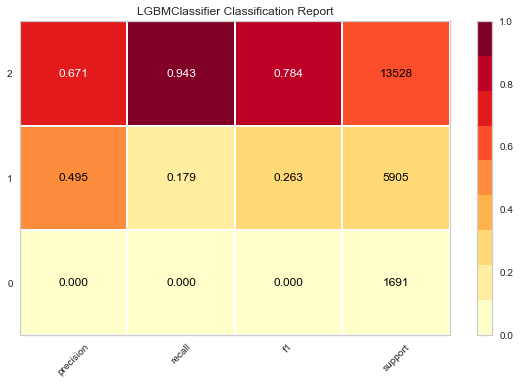

In [34]:
plot_model(tuned_lightgbm, plot = 'class_report')

##### AUC

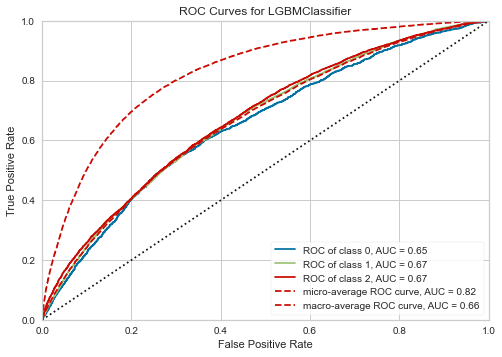

In [35]:
plot_model(tuned_lightgbm, plot = 'auc')

##### Feature Importance

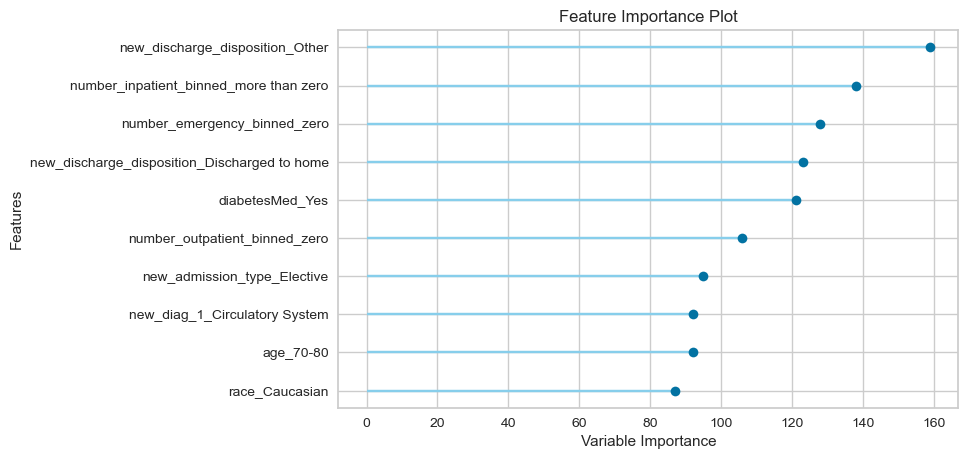

In [36]:
plot_model(tuned_lightgbm, plot = 'feature')

##### Prediction Error Plot

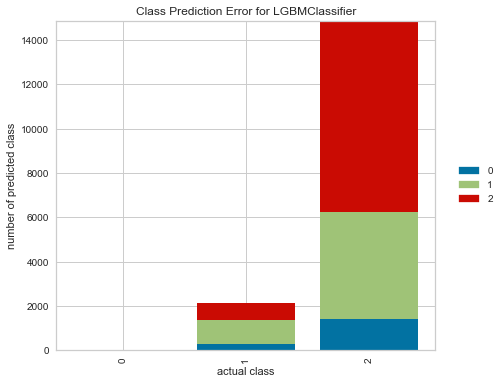

In [38]:
plot_model(tuned_lightgbm, plot = 'error')

#### Extreme Gradient Boosting

##### Confusion Matrix

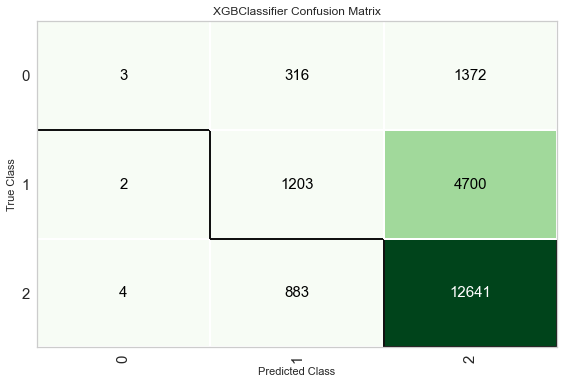

In [39]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

##### Classification Report

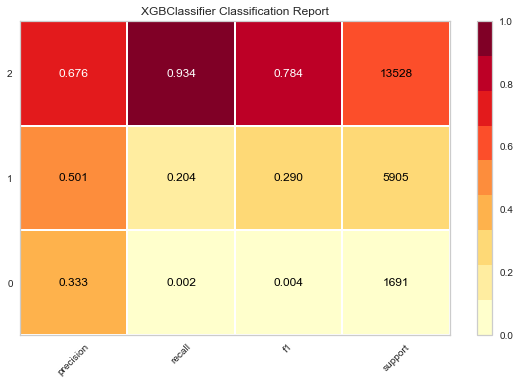

In [40]:
plot_model(tuned_xgboost, plot = 'class_report')

##### AUC

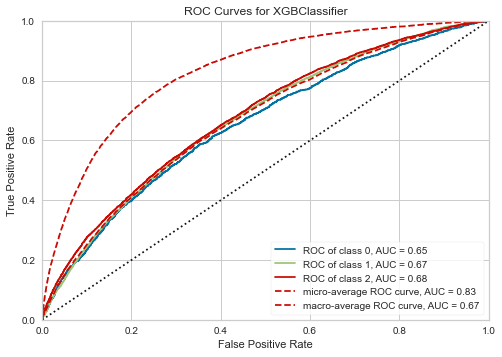

In [41]:
plot_model(tuned_xgboost, plot = 'auc')

##### Feature Importance

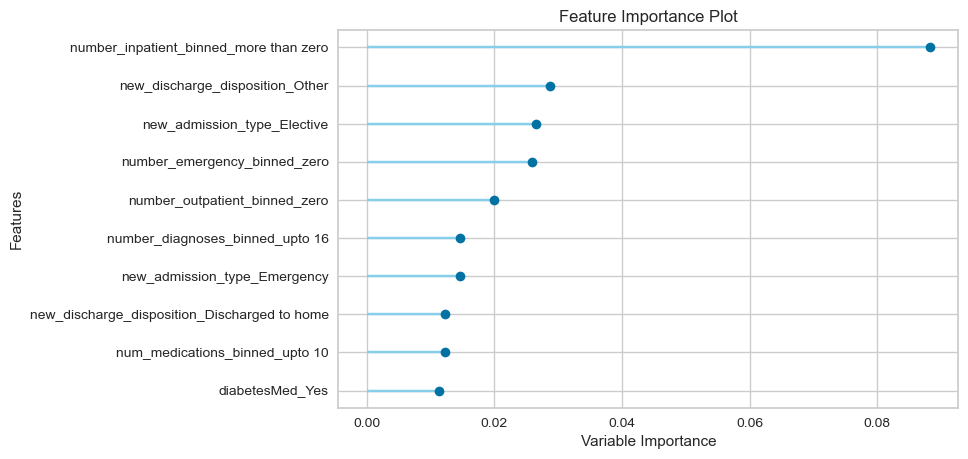

In [42]:
plot_model(tuned_xgboost, plot = 'feature')

##### Prediction Error Plot

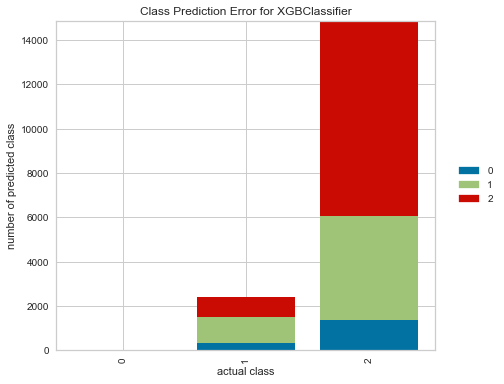

In [43]:
plot_model(tuned_xgboost, plot = 'error')

### Prediction

#### CatBoost Classifier

In [22]:
predict_model(catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6521,0.6737,0.3827,0.6067,0.5856,0.1440,0.1734


##### Light Gradient Boosting Machine

In [23]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6536,0,0.3738,0.5684,0.5756,0.1253,0.1639


##### Extreme Gradient Boosting

In [24]:
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6555,0.6744,0.3800,0.5993,0.5834,0.1406,0.1763
